In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import corner_harris
from PIL import Image
import matplotlib.image as mpimg
sift = cv2.xfeatures2d.SIFT_create()
from skimage.feature import corner_harris
import matplotlib.image as mpimg
from scipy import spatial
from skimage.feature import peak_local_max
from matplotlib.patches import ConnectionPatch
from corner_detector import corner_detector
from anms import anms
from sklearn.neighbors import NearestNeighbors
from feat_desc import feat_desc
from feat_match import feat_match
from matplotlib.patches import ConnectionPatch

In [5]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

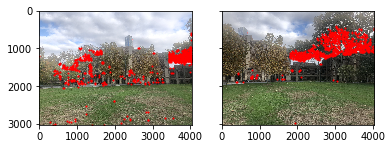

In [6]:
# Step 1 && Step 2
img_1 = mpimg.imread("left.jpg")
gray_1 = rgb2gray(img_1)
img_2 = mpimg.imread("middle.jpg")
gray_2 = rgb2gray(img_2)
# img_1 = cv2.imread('left.jpg')
# img_2 = cv2.imread('middle.jpg')
# gray_1=cv2.imread("left.jpg",0)
# gray_2=cv2.imread("middle.jpg",0)
cimg_1 = corner_detector(gray_1)
cimg_2 = corner_detector(gray_2)
x_1,y_1,r_max_1 = anms(cimg_1,2000)
x_2,y_2,r_max_2 = anms(cimg_2,2000)
x_1 = np.asarray(x_1)
y_1 = np.asarray(y_1)
x_2 = np.asarray(x_2)
y_2 = np.asarray(y_2)
fig, (ax,ay) = plt.subplots(1, 2, sharey=True)
ax.imshow(img_1)
ay.imshow(img_2)
ax.plot(x_1, y_1, color='r', marker='o',
        linestyle='None', markersize=1)
ay.plot(x_2, y_2, color='r', marker='o',
        linestyle='None', markersize=1)
plt.show()

In [1]:
# Step 3 & 4
descs1 = feat_desc(gray_1,x_1,y_1)
descs2 = feat_desc(gray_2,x_2,y_2)
match = feat_match(descs1, descs2)
idx_1 = np.argwhere(match > -1)
idx_1 = idx_1.flatten()
print(idx_1)
idx_2 = np.take(match,idx_1)
idx_2 = idx_2.astype(int)
print(idx_2)
draw_x1 = x_1[idx_1]
draw_y1 = y_1[idx_1]
draw_x2 = x_2[idx_2]
draw_y2 = y_2[idx_2]

# Display Result
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

ax1.imshow(img_1)
ax1.plot(draw_x1, draw_y1, color='r', marker='o',
        linestyle='None', markersize=1)

ax2.imshow(img_2)
ax2.plot(draw_x2, draw_y2, color='r', marker='o',
        linestyle='None', markersize=1)


for i in range(draw_x1.size):
    xy1 = (draw_x1[i],draw_y1[i])
    xy2 = (draw_x2[i],draw_y2[i])
    con = ConnectionPatch(xyA=xy2, xyB=xy1, coordsA="data", coordsB="data",
                      axesA=ax2, axesB=ax1, color='#53F242')
    ax2.add_artist(con)

plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

NameError: name 'feat_desc' is not defined